In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [351]:
df = pd.read_csv('C:/Users/GC/Desktop/2021/연구/장기베스트셀러/데이터/Bestseller_Fiction.csv', encoding="cp949")

In [352]:
df

,BestsellerFic,Genre,GenreBin,Title,Author,Published Year,Publisher,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Duration,변경전Duration,변경후Duration3(0=S1=L2=etc),Impact,year_rank,isGlobal50 of first year(False=0True=1)
0,2020,Literature&Fiction,6,Where the Crawdads Sing,Delia Owens,2017,G.P. Putnam's Sons,209,26.00,1,1,3,1,1,53800.0000,2019_01,1
1,2020,Literature&Fiction,6,The Silent Patient,Alex Michaelides,2019,Celadon Books,336,26.99,0,1,2(2019),2,1,23700.0000,2019_39,1
2,2020,Literature&Fiction,6,Then She Was Gone,Lisa Jewell,2018,Atria Books,384,16.00,1,1,2(2019),2,1,38620.0298,2019_90,1
3,2020,Teen&Youngadult,6,To Kill a Mockingbird,Harper Lee,2005,Harper Perennial,336,15.99,1,0,7,1,1,400958.9970,2019_41,1
4,2020,Teen&Youngadult,6,The Outsiders,S. E. Hinton,2006,Speak,224,10.99,1,1,5,1,1,133000.0000,2019_99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2011,Teen&Youngadult,6,The Lost Hero (Heroes of Olympus Book 1),Rick Riordan,2010,Disney-Hyperion,592,1.99,0,0,1,0,0,43400.0000,NaN,0
144,2011,Literature&Fiction,6,Room,Emma Donoghue,2011,Back Bay Books,352,16.99,1,1,1,0,0,26200.0000,NaN,1
145,2011,Literature&Fiction,6,Hotel on the Corner of Bitter and Sweet,Jamie Ford,2009,Ballantine Books,301,17.00,0,0,1,0,0,179000.0000,NaN,1
146,2011,Literature&Fiction,6,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,2009,Vintage Crime/Black Lizard,631,9.99,0,0,1,0,0,32600.0000,NaN,1


In [379]:
df_x = df[['Published Year', 'Page', 'Price','authorgender(male0fe1team2)', 'isFirstBestSeller','Impact', 'isGlobal50 of first year(False=0True=1)']]
df_y = df['변경후Duration3(0=S1=L2=etc)']

In [472]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 100)

In [492]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [571]:
#kNN = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
cov = np.cov(x_test, rowvar=False)
kNN = KNeighborsClassifier(algorithm='brute', n_neighbors = 3, metric = 'mahalanobis', metric_params=dict(V=cov))

In [572]:
kNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='mahalanobis',
                     metric_params={'V': array([[ 1.68091954e+01, -1.85611494e+02,  3.05374713e+00,
         1.72413793e-01, -6.06896552e-01, -6.97642686e+07,
        -3.21839080e-02],
       [-1.85611494e+02,  8.31826944e+05,  6.06866985e+03,
        -1.01017241e+02, -9.52827586e+01, -8.33090450e+09,
         5.79816092e+01],
       [ 3.05374713e+00,  6.06866985e+03,  1.35320569e...
        -3.44827586e-02],
       [-6.06896552e-01, -9.52827586e+01,  7.71241379e-01,
         3.44827586e-02,  2.48275862e-01,  1.40429947e+07,
        -2.75862069e-02],
       [-6.97642686e+07, -8.33090450e+09, -1.46047976e+08,
        -1.15851663e+07,  1.40429947e+07,  7.16006045e+15,
         6.84658476e+06],
       [-3.21839080e-02,  5.79816092e+01, -1.04094253e+00,
        -3.44827586e-02, -2.75862069e-02,  6.84658476e+06,
         2.02298851e-01]])},
                     n_neighbors=3)

In [573]:
y_pred = kNN.predict(x_valid)

C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


In [574]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [575]:
confusion_matrix(y_valid, y_pred, labels = [1, 0])

array([[ 3,  8],
       [ 2, 17]], dtype=int64)

In [576]:
conf_matrix = pd.DataFrame(confusion_matrix(y_valid, y_pred), columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])

In [577]:
conf_matrix

,pred_0,pred_1
true_0,17,2
true_1,8,3


In [578]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [579]:
kNN.predict_proba(x_valid)

C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ]])

C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


ROC AUC: 0.677


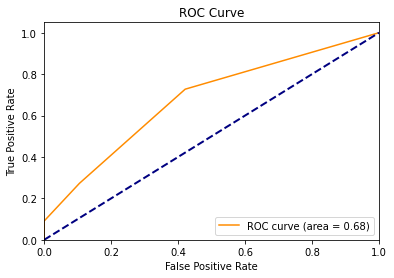

In [580]:
fpr, tpr, _ = roc_curve(y_valid, kNN.predict_proba(x_valid)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [581]:
fpr

array([0.        , 0.        , 0.10526316, 0.42105263, 1.        ])

In [582]:
tpr

array([0.        , 0.09090909, 0.27272727, 0.72727273, 1.        ])

In [583]:
predictions = kNN.predict(x_valid)

C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


In [584]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [585]:
print(f'Accuracy: {accuracy_score(y_valid, predictions):0.3f}')
print(f'Precision: {precision_score(y_valid, predictions):0.3f}')
print(f'Recall: {recall_score(y_valid, predictions):0.3f}')
print(f'f1: {f1_score(y_valid, predictions):0.3f}')

Accuracy: 0.667
Precision: 0.600
Recall: 0.273
f1: 0.375


In [586]:
print(kNN.score(x_train, y_train))

0.7711864406779662


In [587]:
print(kNN.score(x_test, y_test))

0.6666666666666666


C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
